### Исследования рынка общепита в Москве для принятия решения об открытии нового заведения

Инвесторы из фонда «Shut Up and Take My Money» решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан, пиццерия, паб или бар, — и какими будут расположение, меню и цены.
<br>Для начала они просят меня подготовить исследование рынка Москвы, найти интересные особенности и презентовать полученные результаты, которые в будущем помогут в выборе подходящего инвесторам места.
<br>Мне доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

Изучу общую информацию о датасете. Узнаю сколько заведений представлено. Посмотрю на значения столбцов и их тип данных. Для начала импортирую библиотеки, который мне понадобятся для исследования.

In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import plotly.express as px

In [ ]:
!pip install folium

In [ ]:
import folium

In [ ]:
import json

Загружу данные.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/My Drive/moscow_places
df = pd.read_csv('moscow_places.csv')

Mounted at /content/drive/
/content/drive/My Drive/moscow_places


Посмотрю общую информацию о датасете.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               8406 non-null   object 
 1   category           8406 non-null   object 
 2   address            8406 non-null   object 
 3   district           8406 non-null   object 
 4   hours              7870 non-null   object 
 5   lat                8406 non-null   float64
 6   lng                8406 non-null   float64
 7   rating             8406 non-null   float64
 8   price              3315 non-null   object 
 9   avg_bill           3816 non-null   object 
 10  middle_avg_bill    3149 non-null   float64
 11  middle_coffee_cup  535 non-null    float64
 12  chain              8406 non-null   int64  
 13  seats              4795 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 919.5+ KB


In [ ]:
df.head()

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",55.878494,37.478860,5.0,NaN,NaN,NaN,NaN,0,NaN
1,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",55.875801,37.484479,4.5,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN,0,4.0
2,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",55.889146,37.525901,4.6,средние,Средний счёт:от 1000 ₽,1000.0,NaN,0,45.0
3,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN
4,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",55.881166,37.449357,5.0,средние,Средний счёт:400–600 ₽,500.0,NaN,1,148.0


Известно следующее:
<br>


*   `name` — название заведения;
*   `address` — адрес заведения;
*   `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
*   `hours` — информация о днях и часах работы;
*   `lat` — широта географической точки, в которой находится заведение;
*   `lng` — долгота географической точки, в которой находится заведение;
*   `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
*   `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
*   `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
<br>«Средний счёт: 1000–1500 ₽»;
<br>«Цена чашки капучино: 130–220 ₽»;
<br>«Цена бокала пива: 400–600 ₽».
и так далее;
*   `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
<br>Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
<br>Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
<br>Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
*   `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
<br>Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
<br>Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
<br>Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.
*   `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
<br>0 — заведение не является сетевым
<br>1 — заведение является сетевым
*   `district` — административный район, в котором находится заведение, например Центральный административный округ;
*   `seats` — количество посадочных мест.








Изучу, есть ли дубликаты в данных. Поищу пропуски: встречаются ли они, в каких столбцах? Посмотрю: Можно ли их обработать или оставить как есть?
<br>Выполню предобработку данных:
*  Создам столбец `street` с названиями улиц из столбца с адресом.
*  Создам столбец `is_24/7` с обозначением, что заведение работает ежедневно и круглосуточно (24/7):
   *   логическое значение `True` — если заведение работает ежедневно и круглосуточно;
   *   логическое значение `False` — в противоположном случае.



Изучу датафрейм на количество дубликатов и пропусков.

In [ ]:
df.duplicated().sum()

0

Дубликаты отсутвуют, скорее всего будут присутсвовать дубликаты по столбцам.

In [ ]:
df['name'].duplicated().sum()

2792

Проверю датасет на наличие неявных дубликатов. Для поиска необходимо привести названия заведений в единый регистр (нижний), а также проверю по столбцам: имя заведения, адрес и округ.

In [ ]:
df['name'] = df['name'].str.lower()

In [ ]:
df[df.duplicated(subset = ['name', 'address', 'district'], keep=False)]

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats
1430,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"ежедневно, 09:00–21:00",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,0,188.0
1511,more poke,ресторан,"Москва, Волоколамское шоссе, 11, стр. 2",Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",55.806307,37.497566,4.2,NaN,NaN,NaN,NaN,1,188.0
2211,раковарня клешни и хвосты,ресторан,"Москва, проспект Мира, 118",Северо-Восточный административный округ,"ежедневно, 12:00–00:00",55.810553,37.638161,4.4,NaN,NaN,NaN,NaN,0,150.0
2420,раковарня клешни и хвосты,"бар,паб","Москва, проспект Мира, 118",Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",55.810677,37.638379,4.4,NaN,NaN,NaN,NaN,1,150.0
3091,хлеб да выпечка,булочная,"Москва, Ярцевская улица, 19",Западный административный округ,"ежедневно, 09:00–22:00",55.738886,37.411648,4.1,NaN,NaN,NaN,NaN,1,276.0
3109,хлеб да выпечка,кафе,"Москва, Ярцевская улица, 19",Западный административный округ,NaN,55.738449,37.410937,4.1,NaN,NaN,NaN,NaN,0,276.0


Удалю найденные неявные дубликаты

In [ ]:
df.drop_duplicates(subset=['name', 'address', 'district'], keep='first', inplace=True)

Это связано с тем что в датасете присутсвуют сетевые заведения общепита.

In [ ]:
df.isna().sum()

name                    0
category                0
address                 0
district                0
hours                 535
lat                     0
lng                     0
rating                  0
price                5088
avg_bill             4587
middle_avg_bill      5254
middle_coffee_cup    7868
chain                   0
seats                3611
dtype: int64

Присутсвуют пропуски в столбцах связанных с ценами, также столбцы `middle_avg_bill` и `middle_coffee_cup` связаны со столбцом `avg_bill`. Это большое количество данных, удалять я их не буду.

Создам столбец `street` с названиями улиц из столбца с адресом.

In [ ]:
df['address'] # исходя из столбца мы видим чтоб название улиц "огорожено" запятыми по краям, вытащим название улиц, проездов проспектов и тд. через лямбда-функцию

0                       Москва, улица Дыбенко, 7/1
1               Москва, улица Дыбенко, 36, корп. 1
2                   Москва, Клязьминская улица, 15
3              Москва, улица Маршала Федоренко, 12
4                  Москва, Правобережная улица, 1Б
                           ...                    
8401                 Москва, Профсоюзная улица, 56
8402    Москва, Пролетарский проспект, 19, корп. 1
8403        Москва, Люблинская улица, 112А, стр. 1
8404        Москва, Люблинская улица, 112А, стр. 1
8405                Москва, Россошанский проезд, 6
Name: address, Length: 8403, dtype: object

In [ ]:
df['street'] = df['address'].apply(lambda x: x.split(",")[1].strip())
df['street']

0                 улица Дыбенко
1                 улица Дыбенко
2            Клязьминская улица
3       улица Маршала Федоренко
4           Правобережная улица
                 ...           
8401          Профсоюзная улица
8402      Пролетарский проспект
8403           Люблинская улица
8404           Люблинская улица
8405        Россошанский проезд
Name: street, Length: 8403, dtype: object

Создам столбец `is_24/7`.

In [ ]:
df['is_24/7'] = df['hours'].str.contains('круглосуточно')
df['is_24/7']

0       False
1       False
2       False
3       False
4       False
        ...  
8401    False
8402    False
8403     True
8404     True
8405     True
Name: is_24/7, Length: 8403, dtype: object



### Промежуточный итог:
> В первых двух шагах исследования я загрузил и изучили общую информацию датасета. Увидел список 8406 заведений общественного питания Москвы.
<br> Выполнил предобработку данных: создали 2 столбца с названием улиц и обозначениям часов работы заведения.




Следующим шагом будет анализ данных, отвечу на следующие вопросы:

*   Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по категориям: рестораны, кофейни, пиццерии, бары и так далее. Постройте визуализации. Отвечу на вопрос о распределении заведений по категориям.
*   Исследую количество посадочных мест в местах по категориям: рестораны, кофейни, пиццерии, бары и так далее. Построю визуализации. Проанализирую результаты и сделаю выводы.
*   Рассмотрю и изображу соотношение сетевых и несетевых заведений в датасете. Отвечу на вопрос: Каких заведений больше?
*   Какие категории заведений чаще являются сетевыми? Исследую данные и отвечу на вопрос графиком.
*   Сгруппирую данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Под популярностью понимается количество заведений этой сети в регионе. Построю подходящую для такой информации визуализацию.
*   Какие административные районы Москвы присутствуют в датасете? Отображу общее количество заведений и количество заведений каждой категории по районам. Попробую проиллюстрировать эту информацию одним графиком.
*   Визуализирую распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги в разных типах общепита?
*   Построю фоновую картограмму (хороплет) со средним рейтингом заведений каждого района. Границы районов Москвы, которые встречаются в датасете, хранятся в файле `admin_level_geomap.geojson`.
*   Отобразите все заведения датасета на карте с помощью кластеров средствами библиотеки `folium`.
*   Найду топ-15 улиц по количеству заведений. Построю график распределения количества заведений и их категорий по этим улицам. Попробую проиллюстрировать эту информацию одним графиком.
*   Найду улицы, на которых находится только один объект общепита.
*   Значения средних чеков заведений хранятся в столбце `middle_avg_bill`. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаю медиану этого столбца для каждого района. Использую это значение в качестве ценового индикатора района. Построю фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализирую цены в центральном административном округе и других.
*   Проиллюстрирую и другие взаимосвязи, которые найду в данных.
*   Соберу наблюдения по вопросам выше в один общий вывод.










Для начала посмотрю какие категории присутсвуют в датасете.

In [ ]:
df['category'].unique()

array(['кафе', 'ресторан', 'кофейня', 'пиццерия', 'бар,паб',
       'быстрое питание', 'булочная', 'столовая'], dtype=object)

Построю гистограмму с количеством заведений в каждой категории.

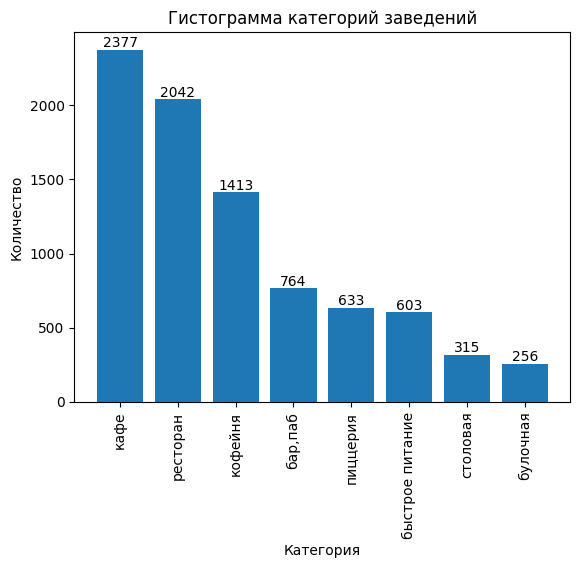

In [ ]:
category_counts = df['category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Гистограмма категорий заведений')
plt.xticks(rotation=90)
for i, count in enumerate(category_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

Самым популярным заведением в Москве является кафе 2378 заведений. Не удивительно, в кафе время подачи блюд ниже чем в ресторанах, а в большом мегаполисе очень высокий темп жизни.


*   Менее популярны, но тоже с большим количеством присутвуют рестораны, 2043 ресторана в Москве. Это нам говорит о платежеспобности населения города, как правило из всех перечисленных категорий, самая высокий средний чек в ресторанах.
*   Гораздо меньше присутсвует в Москве кофеен, 1413, что выглядит немного странным, ведь кофейные напитки сегодня продают практически везде, вероятно здесь не учитываются кофе-бары в формате «кофе с собой», в данным датасете все таки присутвую заведения с посадочными местами.
*   Ещё меньше баров и пабов, 765. Малое количество баров и пабов в крупных мегаполисах объясняется сложным сочетанием факторов, включая конкуренцию и высокую стоимость аренды коммерческих помещениях вместах высокого траффика людей.
*   На пятой строчке по полуярности с небольшой разницей расположились пиццерии (633) и заведения быстрого питания (603). Пиццерии это заведения общественного питания узкой направленности, в заведениях подаётся в основном пицца, учитывая огрмное количество служб доставки, вероятно пиццерия не самое популярное заведение для бизнеса. А к заведениям быстрого питания вероятно нет высокого доверия, поэтому их так мало. Исходим из того, что в список заведений быстрого питания не входят сетевые популярные заведения.
*   Замыкает список столовые и булочные с количеством 315 и 256 заведений соответсвенно. Скорее всего бизнес не предпочитает позиционировать себя как "Столовая" или "Булочная", как бы намекая на категории общественного питания из
советского прошлого.

Посмотрю на количество посадчных мест по категориям.

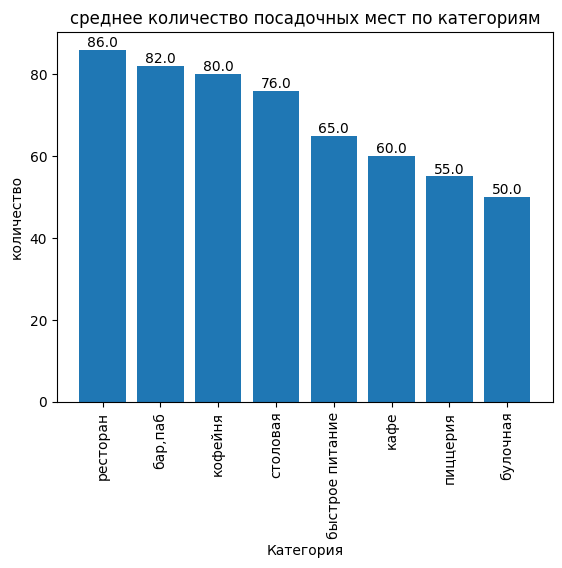

In [ ]:
grouped_data = df.groupby('category')['seats'].median().round()
grouped_data = grouped_data.sort_values(ascending=False)
plt.bar(grouped_data.index, grouped_data.values)
plt.xlabel('Категория')
plt.ylabel('количество')
plt.title('среднее количество посадочных мест по категориям')
for i, count in enumerate(grouped_data.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(rotation=90)
plt.show()

Здесь видны другие лидеры:
*   Рестораны готовы разместить в среднем 86 человек, большое количество посадочных мест связано с тем, что рестораны обычно предлагают широкий выбор блюд и создают комфортные условия для длительного пребывания посетителей.
*   Бары и пабы довольно внушительных размеров, в среднем вмещают 82 посадочных места, бары и пабы имеют меньшее среднее количество посадочных мест по сравнению с ресторанами. Бары, как правило, ориентированы на обслуживание гостей, которые предпочитают более активный образ жизни и короткое время пребывания;
*   В кофейнях также достаточно места, в среднем 80 посадочных мест;
*   Столовые как правило с низкой ценой на блюда, но высокой заполняемостью, на 4 строчке в нашем графике, 76 человек;
*   Рядом также расположились заведения быстрого питания и кафе 65 и 60 посадочных мест в среднем Кафе часто предлагают более непринужденную атмосферу и более доступные цены по сравнению с ресторанами, что делает их популярными среди широкого круга посетителей.
*   В пиццерях Москвы в среднем можно разместить 55 человек;
*   И замыкает список булочные, с средним количеством посадочных мест - 50.
<br>
Данные не идеальны и вероятно не отображают действительность, более объективное исследование поможет провести отсутствие пропусков, которых в столбце `seats` аж 43%.








Рассмотрю и изображу соотношение сетевых и несетевых заведений в датасете.

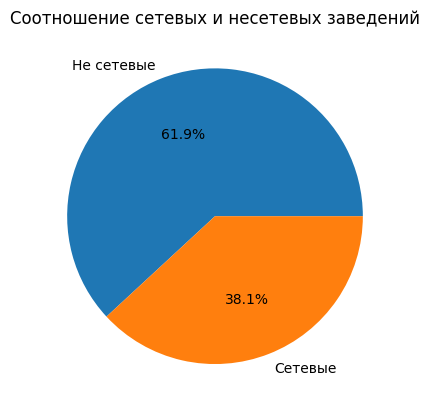

In [ ]:
counts = df['chain'].value_counts()
plt.pie(counts, labels=['Не сетевые', 'Сетевые'], autopct='%1.1f%%')
plt.title('Соотношение сетевых и несетевых заведений')
plt.show()

На круговой диаграмме видно, что количество несетевых заведений больше чем сетевых.
<br> Далее определю какие категории заведений чаще являются сетевыми. Исследую этот вопрос и отобразим на графике.

In [ ]:
df_chain_share = df.pivot_table(index='category', columns='chain', values='name', aggfunc='count')
df_chain_share.columns = ['not_chain', 'chain']
df_chain_share['total'] = df_chain_share['not_chain'] + df_chain_share['chain']
df_chain_share['share'] = (df_chain_share['chain']/df_chain_share['total']*100).round().astype('int')
df_chain_share = df_chain_share.rename(
    columns={'not_chain': 'не сеть',
             'chain': 'сеть',
             'share':'сотношение',
             'total':'общее кол-во' })
df_chain_share.sort_values(by='сотношение', ascending=False)

,не сеть,сеть,общее кол-во,сотношение
category,,,,
булочная,99,157,256,61
пиццерия,303,330,633,52
кофейня,693,720,1413,51
быстрое питание,371,232,603,38
ресторан,1313,729,2042,36
кафе,1598,779,2377,33
столовая,227,88,315,28
"бар,паб",596,168,764,22


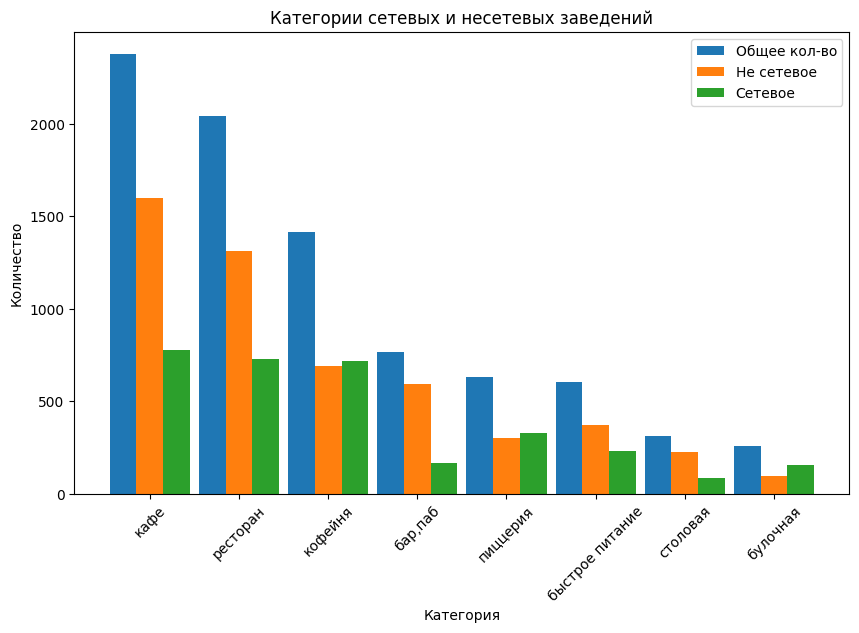

In [ ]:
df_chain_share_sorted = df_chain_share.sort_values(by='общее кол-во', ascending=False)


plt.figure(figsize=(10, 6))


categories = df_chain_share_sorted.index
not_chain = df_chain_share_sorted['не сеть']
chain = df_chain_share_sorted['сеть']
total = df_chain_share_sorted['общее кол-во']

x = np.arange(len(categories))

width = 0.3

plt.bar(x, total, width, label='Общее кол-во')
plt.bar(x + width, not_chain, width, label='Не сетевое')
plt.bar(x + (2 * width), chain, width, label='Сетевое')

plt.xlabel('Категория')
plt.ylabel('Количество')
plt.title('Категории сетевых и несетевых заведений')

plt.xticks(x + width, categories, rotation=45)

plt.legend()
plt.show()

Самая популярные категории среди сетевых общепитов это кафе, рестораны и кофейни. Данные категории требуют не малых инвестиционных вложений для открытия, таких как мебелирование, персонал, кухня и тд. Далее следуют пиццерии, заведения быстрого питания, бары, булочные и замыкают список столовые. Исходя из диаграммы можно сделать вывод, что сетевое распределение характерно для: кафе, ресторанов, кофеен и пиццерий.

Сгруппирую данные по названиям заведений и найдём топ-15 популярных сетей в Москве.

In [ ]:
temp = df.groupby('name').agg({'category': 'first', 'chain': 'count'}).sort_values(by='chain', ascending=False).head(22).reset_index()
temp

,name,category,chain
0,кафе,кафе,189
1,шоколадница,кофейня,120
2,домино'с пицца,пиццерия,77
3,додо пицца,пиццерия,74
4,one price coffee,кофейня,72
5,яндекс лавка,ресторан,69
6,cofix,кофейня,65
7,prime,ресторан,50
8,хинкальная,быстрое питание,44
9,шаурма,быстрое питание,43


Самая популярная сеть кафе это "Кафе", очевидно, что это не сеть заведений, а просто категория заведения без названия. Удалим следующие позиции:


1.   заведения с названием "Кафе"
2.   заведения с названием "Ресторан"
3.   заведения с названием "Хинкальная"
4.   заведения с названием "Шаурма"
5.   заведения с названием "Чайхана"
6.   заведения с названием "Яндекс Лавка"



Сформирую список топ-15 вновь.Для этого поправим изначальный список на 22 строки.

In [ ]:
temp = temp[~temp['name'].str.contains('Кафе|Ресторан|Хинкальная|Шаурма|Чайхана|Столовая|Яндекс Лавка')]
temp.reset_index()
temp

,name,category,chain
0,кафе,кафе,189
1,шоколадница,кофейня,120
2,домино'с пицца,пиццерия,77
3,додо пицца,пиццерия,74
4,one price coffee,кофейня,72
5,яндекс лавка,ресторан,69
6,cofix,кофейня,65
7,prime,ресторан,50
8,хинкальная,быстрое питание,44
9,шаурма,быстрое питание,43


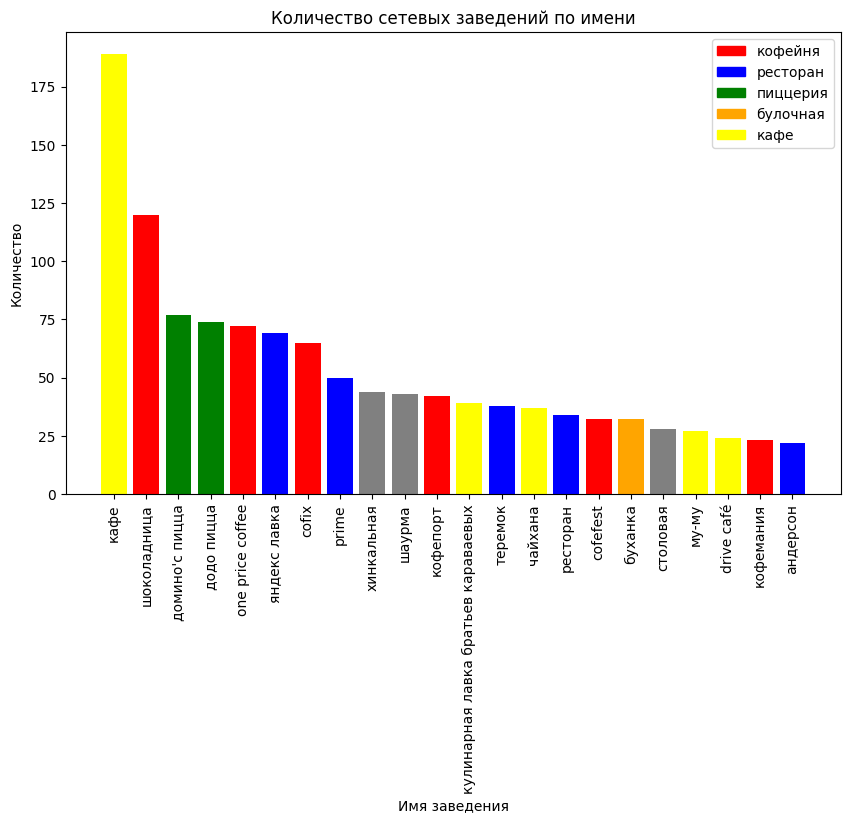

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
category_colors = {'кофейня': 'red', 'ресторан': 'blue', 'пиццерия': 'green', 'булочная': 'orange', 'кафе': 'yellow'}
bars = ax.bar(temp['name'], temp['chain'], color=[category_colors.get(category, 'gray') for category in temp['category']])

ax.set_xlabel('Имя заведения')
ax.set_ylabel('Количество')
ax.set_title('Количество сетевых заведений по имени')
ax.tick_params(axis='x', rotation=90)


legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for category, color in category_colors.items()]

ax.legend(legend_handles, category_colors.keys())

plt.show()

Исходя из графика и таблицы можно сообщить следующее:

*   сеть кофеен "Шоколадница" - лидер по количеству заведений в Москве,
*   вторую и третью строчку берут сетевые пиццерии Доминос и Додо;
*   лидерами по категориями также являются кофейни и  пиццерии.

Изучу какие административные районы Москвы присутствуют в датасете.

In [ ]:
df['district'].unique()

array(['Северный административный округ',
       'Северо-Восточный административный округ',
       'Северо-Западный административный округ',
       'Западный административный округ',
       'Центральный административный округ',
       'Восточный административный округ',
       'Юго-Восточный административный округ',
       'Южный административный округ',
       'Юго-Западный административный округ'], dtype=object)

В датасете представлено 9 административных районов(округов). Отображу общее количество заведений и количество заведений каждой категории по районам.

In [ ]:
grouped_district = df.groupby(['category','district']).size().reset_index(name='count')
grouped_district

,category,district,count
0,"бар,паб",Восточный административный округ,53
1,"бар,паб",Западный административный округ,50
2,"бар,паб",Северный административный округ,68
3,"бар,паб",Северо-Восточный административный округ,62
4,"бар,паб",Северо-Западный административный округ,23
...,...,...,...
67,столовая,Северо-Западный административный округ,18
68,столовая,Центральный административный округ,66
69,столовая,Юго-Восточный административный округ,25
70,столовая,Юго-Западный административный округ,17


In [ ]:
grouped = df.groupby(['district', 'category']).size().reset_index(name='count')

fig = px.bar(grouped, x='district', y='count', color='category', barmode='stack').update_xaxes(categoryorder = 'total descending')

fig.update_layout(
    xaxis_title='Район',
    yaxis_title='Количество заведений',
    title='Количество заведений по районам и категориям',
    legend_title='Категория'
)

fig.show()

Исходя из графика видно, что значительное большинство заведений питания в Центральном административном округе.
<br> Западный, Северный и Северо-Восточный административные округа похожи друг на друга по количеству заведений и  распределению по категориям заведений общепита. С вышеупомянутыми округами второе место по количеству заведений также делит Южный административный округ.

Визуализирую распределение средних рейтингов по категориям заведений. Посмотрю: сильно ли различаются усреднённые рейтинги в разных типах общепита?

In [ ]:
df['rating'].describe()

count    8403.000000
mean        4.229894
std         0.470426
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

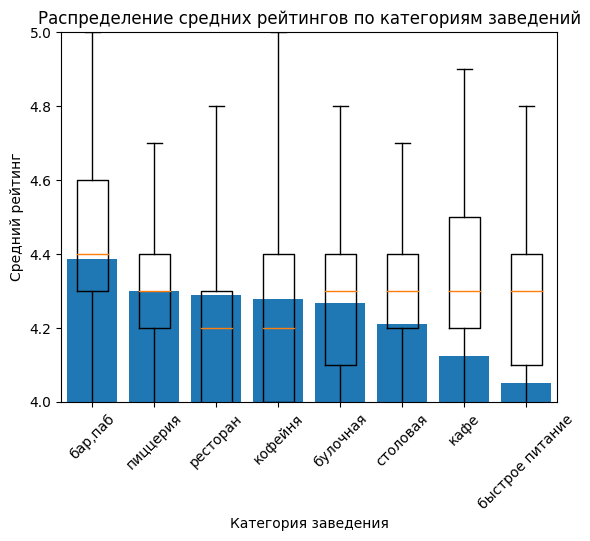

In [ ]:
grouped = df.groupby('category')['rating'].mean()
grouped = grouped.sort_values(ascending=False)

plt.bar(grouped.index, grouped.values)
plt.ylim(4, 5)
plt.tick_params(axis='x', rotation=45)
plt.xlabel('Категория заведения')
plt.ylabel('Средний рейтинг')
plt.title('Распределение средних рейтингов по категориям заведений')

plt.boxplot(df.groupby('category')['rating'].apply(list), positions=range(len(grouped)), showfliers=False, widths=0.5)

plt.xticks(range(len(grouped)), grouped.index)

plt.show()

Самые высокорейтинговые заведения это бары и пабы, очевидно развлекательное времяпровождение в подобных заведения оставляют положительные эмоции посетителей, что способоствует высокой оценке заведения.
<br> Категории пиццерия, ресторан, кофейня и булочная имеют примерно одинаковый средний рейтинг.
<br> А вот заведения категории быстрое питание к сожалению с самым низким средним рейтингом, вероятно из-за не высокого доверия к подобным заведениям.

Построю таблицу и  фоновую картограмму (хороплет) со средним рейтингом заведений каждого района.

In [ ]:
rating_df = df.groupby('district', as_index=False)['rating'].agg('mean')
rating_df.sort_values(by = 'rating', ascending = False).round(2)

,district,rating
5,Центральный административный округ,4.38
2,Северный административный округ,4.24
4,Северо-Западный административный округ,4.21
8,Южный административный округ,4.18
1,Западный административный округ,4.18
0,Восточный административный округ,4.17
7,Юго-Западный административный округ,4.17
3,Северо-Восточный административный округ,4.15
6,Юго-Восточный административный округ,4.10


In [ ]:
from folium import Map, Choropleth, Marker

state_geo = 'https://code.s3.yandex.net/data-analyst/admin_level_geomap.geojson'


moscow_lat, moscow_lng = 55.751244, 37.618423


m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data= rating_df,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Средний рейтинг заведений по районам',
).add_to(m)

m

Самые высокие средние рейтинги у заведений в Центральном административном округе, Москва - столица страны, для успешного бизнеса заведения общественного питания должны привлекать большой поток туристов , а значит поддерживать высокие стандарты качества кухни и обслуживания, отсюда и высокий средний рейтинг, ещё стоит учитывать более высокий уровень жизни в центре города, как следствие более требовательный клиент.

Отображу все заведения датасета на карте с помощью кластеров

In [ ]:
from folium.plugins import MarkerCluster
# здесь мы перезаписываем карту Москвы
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

marker_cluster = MarkerCluster().add_to(m)
def create_clusters(row):
    Marker(
        [row['lat'], row['lng']],
        popup=f"{row['name']} {row['rating']}",
    ).add_to(marker_cluster)

df.apply(create_clusters, axis=1)

m

Output hidden; open in https://colab.research.google.com to view.

Теперь на карте Москвы наглядно видно, где какие заведения расположены.

Найду топ-15 улиц по количеству заведений. Построю график распределения количества заведений и их категорий по этим улицам. Попробую проиллюстрировать эту информацию одним графиком.

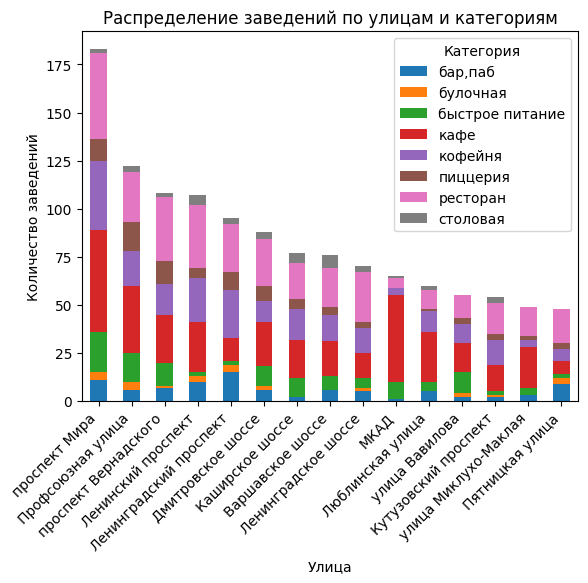

In [ ]:
top_15_streets = df['street'].value_counts().nlargest(15)
top_15_streets = top_15_streets.index.tolist()
filtered_data = df[df['street'].isin(top_15_streets)]

grouped_data = filtered_data.groupby(['street', 'category']).size().unstack()
grouped_data['Total'] = grouped_data.sum(axis=1)
grouped_data = grouped_data.sort_values(by='Total', ascending=False)
grouped_data = grouped_data.drop(columns='Total')
grouped_data.plot(kind='bar', stacked=True)

plt.xlabel('Улица')
plt.ylabel('Количество заведений')
plt.title('Распределение заведений по улицам и категориям')

plt.legend(title='Категория')

plt.xticks(rotation=45, ha='right')

plt.show()

Проспект Мира лидер по количеству заведений, где преобладают категории кафе, рестораны и кофейни. А вот меньше всего заведений на улице Пятницкой, расположенной в центре столицы, вероятно из-за короткой протяженности.

In [ ]:
single_outlet_streets = df['street'].value_counts()[df['street'].value_counts() == 1].index
filtered_df = df.query('street in @single_outlet_streets')
filtered_df

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
15,дом обеда,столовая,"Москва, улица Бусиновская Горка, 2",Северный административный округ,пн-пт 08:30–18:30; сб 10:00–20:00,55.885890,37.493264,4.1,средние,Средний счёт:300–500 ₽,400.0,NaN,0,180.0,улица Бусиновская Горка,False
21,7/12,кафе,"Москва, Прибрежный проезд, 7",Северный административный округ,"ежедневно, 10:00–22:00",55.876805,37.464934,4.5,NaN,NaN,NaN,NaN,0,NaN,Прибрежный проезд,False
25,в парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
58,coffeekaldi's,кофейня,"Москва, Угличская улица, 13, стр. 8",Северо-Восточный административный округ,"ежедневно, 09:00–22:00",55.900316,37.570558,4.1,средние,Средний счёт:500–800 ₽,650.0,NaN,1,NaN,Угличская улица,False
60,чебуречная история,кофейня,"Москва, ландшафтный заказник Лианозовский",Северо-Восточный административный округ,"ежедневно, 10:00–22:00",55.899845,37.570488,4.9,NaN,NaN,NaN,NaN,1,NaN,ландшафтный заказник Лианозовский,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8289,мираж,ресторан,"Москва, улица Шкулёва, 2А",Юго-Восточный административный округ,"пн-пт 11:00–23:00; сб,вс 11:00–00:00",55.693340,37.746231,4.7,NaN,NaN,NaN,NaN,0,90.0,улица Шкулёва,False
8294,wtfcoffee,кофейня,"Москва, улица Артюхиной, 14/8с1",Юго-Восточный административный округ,"ежедневно, 10:00–22:00",55.699044,37.737790,4.4,средние,NaN,NaN,NaN,0,NaN,улица Артюхиной,False
8317,беседка,кафе,"Москва, Кузьминская улица, 10",Юго-Восточный административный округ,"ежедневно, 11:00–23:00",55.690691,37.787735,4.1,NaN,NaN,NaN,NaN,1,NaN,Кузьминская улица,False
8379,лагман хаус,кафе,"Москва, Новороссийская улица, 14, стр. 2",Юго-Восточный административный округ,"ежедневно, 10:00–00:00",55.678772,37.759422,4.3,NaN,NaN,NaN,NaN,1,40.0,Новороссийская улица,False


458 заведний являются единственным общепитом по улице. Гляну на их категории.

In [ ]:
grouped_df = filtered_df.groupby('category')['category'].count().sort_values(ascending=False)
grouped_df

category
кафе               160
ресторан            93
кофейня             84
бар,паб             39
столовая            36
быстрое питание     23
пиццерия            15
булочная             8
Name: category, dtype: int64

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

filtered_df = filtered_df.reset_index()

for index, row in filtered_df.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name']
    ).add_to(m)

m

Исходя из таблицы мы видим, что большинство "одиноких" общепитов это кафе, также мы видим что сетевые заведения тоже присутсвуют в списке, а смотря на карту, можно сказать, что расположение единственного заведения по улице не зависит от местоположения на карте Москвы. "Одинокие" заведения есть как в центре, так и на окраинах столицы.

Значения средних чеков заведений хранятся в столбце `middle_avg_bill`. Эти числа показывают примерную стоимость заказа в рублях, которая чаще всего выражена диапазоном. Посчитаю медиану этого столбца для каждого района. Используйте это значение в качестве ценового индикатора района. Построю фоновую картограмму (хороплет) с полученными значениями для каждого района. Проанализирую цены в центральном административном округе и других.



In [ ]:
median_prices = df.groupby('district')['middle_avg_bill'].median()
median_prices = median_prices.sort_values(ascending=False)
median_prices

district
Западный административный округ            1000.0
Центральный административный округ         1000.0
Северо-Западный административный округ      700.0
Северный административный округ             650.0
Юго-Западный административный округ         600.0
Восточный административный округ            575.0
Северо-Восточный административный округ     500.0
Южный административный округ                500.0
Юго-Восточный административный округ        450.0
Name: middle_avg_bill, dtype: float64

In [ ]:
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data= median_prices,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный чек заведений по районам',
).add_to(m)

m

Высокая медиана среднего чека наблюдается в Центральном и Западном административных округах Москвы. В целом в западной части столицы медиана среднего чека выше, чем в восточной части города. Причина, вероятно следующая: по открытым источникам данным, а также различных геомаректинговых исследований, известно, что, совокупный объем потребительских расходов населения значительно выше в западной части Москвы, чем в восточной.

Далее я планирую рассмотреть, зависимость среднего чека от рейтинга заведения. Для этого построим график корреляции.

Коэффицент корреляции: 0.18323797147624538


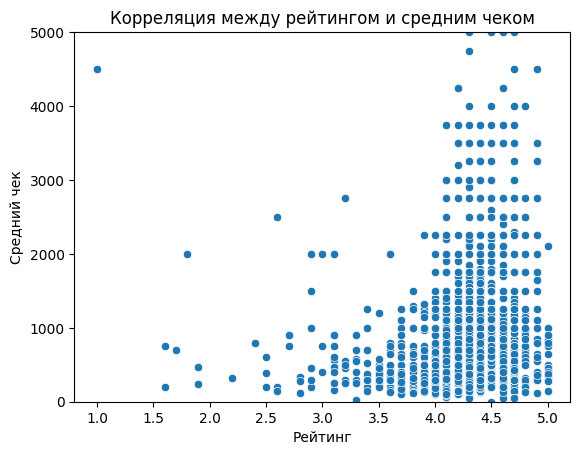

In [ ]:
sns.scatterplot(data=df, x='rating', y='middle_avg_bill')

plt.title('Корреляция между рейтингом и средним чеком')
plt.xlabel('Рейтинг')
plt.ylabel('Средний чек')
plt.ylim(0,5000)

correlation_coeff = df['rating'].corr(df['middle_avg_bill'])
print('Коэффицент корреляции:', correlation_coeff)
plt.show()

На графике заметно, что рейтинг практически не влияет на средний чек заведения. Не мало заведений со средним чеком менее 1000 р, но высоким рейтингом.

### Промежуточный итог:
> В третьем шаге исследования я провел  работу по анализу данных, исходя из этого можно выделить следующие моменты:
*   В таблице представлено 8 категорий заведений общественного питания, лидером по количеству заведений является категория «Кафе», самая невостребованная категория — это «Булочные»;
*   Больше всего клиентов вмещают в себя рестораны, а также бары и пабы;
*   Количество не сетевых заведений больше, чем сетевых в соотношений 60/40.  Самые популярные категории среди сетевых заведений — это кафе, рестораны и кофейни. Однако самое большое количество заведений у сети кофеен «Шоколадница», а также сети пиццерий «Домино’с Пицца» и «Додо Пицца».Количество не сетевых заведений больше, чем сетевых в соотношений 60/40.  Самые популярные категории среди сетевых заведений — это кафе, рестораны и кофейни. Однако самое большое количество заведений у сети кофеен «Шоколадница», а также сети пиццерий «Домино’с Пицца» и «Додо Пицца»;
*   Больше всего заведений расположены в Центральном административном округе. А Северно-Западный административный округ не может похвастаться большим количеством заведений, по сравнению с другими округами Москвы;
*   Самые высокие оценки ставят барам и пабам, а также ресторанам и пиццериям. Географически самый высокий рейтинг у заведений Центрального административного округа;
*   Больше всего заведений Москвы расположено на проспекте Мира, меньше всего на улице Пятницкой;
*   В таблице присутствуют также заведения, которые единственные на улице, в этом перечне есть и сетевые заведения;
*   Средний чек на западе Москвы выше чем в восточной части города, и не зависит от рейтинга заведения.




Детализирую исследование: открытие кофейни
Основателям фонда «Shut Up and Take My Money» не даёт покоя успех сериала «Друзья». Их мечта — открыть такую же крутую и доступную, как «Central Perk», кофейню в Москве. Будем считать, что заказчики не боятся конкуренции в этой сфере, ведь кофеен в больших городах уже достаточно. Попробую определить, осуществима ли мечта клиентов.
Отвечу на следующие вопросы:
*   Сколько всего кофеен в датасете? В каких районах их больше всего, каковы особенности их расположения?
*   Есть ли круглосуточные кофейни?
*   Какие у кофеен рейтинги? Как они распределяются по районам?
*   На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

<br>
Построю визуализации. Попробую дать рекомендацию для открытия нового заведения.

In [ ]:
coffee_shops = df[df['category'] == 'кофейня']
coffee_shops

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
25,в парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
45,9 bar coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,Коровинское шоссе,False
46,cofefest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица Маршала Федоренко,False
52,cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица Дыбенко,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,назис пури,кофейня,"Москва, Люблинская улица, 61",Юго-Восточный административный округ,"ежедневно, 09:00–22:00",55.684103,37.738588,4.5,NaN,NaN,NaN,NaN,0,NaN,Люблинская улица,False
8365,квадрат кофе,кофейня,"Москва, Волгоградский проспект, 73, стр. 1",Юго-Восточный административный округ,"пн-пт 08:30–21:30; сб,вс 09:00–21:30",55.709710,37.744450,4.2,NaN,Цена чашки капучино:100–220 ₽,NaN,160.0,0,206.0,Волгоградский проспект,False
8376,шоколад имбирь корица,кофейня,"Москва, Грайвороновская улица, 23",Юго-Восточный административный округ,пн-пт 09:30–19:30,55.721213,37.740755,4.1,NaN,NaN,NaN,NaN,0,NaN,Грайвороновская улица,False
8385,cafio,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–22:00; сб,вс 07:00–21:00",55.724357,37.716415,4.7,NaN,Цена чашки капучино:80–120 ₽,NaN,100.0,0,NaN,Новохохловская улица,False


В таблице представлено 1413 кофеен.

In [ ]:
coffee_shops_24h = df[df['category'] == 'кофейня'][df['is_24/7'] == True]
coffee_shops_24h

<ipython-input-46-26227e41d6b7>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
200,wild bean,кофейня,"Москва, Дмитровское шоссе, 107Е",Северный административный округ,"ежедневно, круглосуточно",55.878477,37.543426,3.5,NaN,NaN,NaN,NaN,1,20.0,Дмитровское шоссе,True
971,wild bean cafe,кофейня,"Москва, Ярославское шоссе, 116",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.867822,37.708853,4.0,NaN,NaN,NaN,NaN,1,25.0,Ярославское шоссе,True
1047,wild bean cafe,кофейня,"Москва, Ярославское шоссе, вл3с3",Северо-Восточный административный округ,"ежедневно, круглосуточно",55.851778,37.676423,4.5,NaN,Цена чашки капучино:140–200 ₽,NaN,170.0,1,NaN,Ярославское шоссе,True
1214,wild bean cafe,кофейня,"Москва, МКАД, 65-й километр, 8",Северо-Западный административный округ,"ежедневно, круглосуточно",55.813787,37.390701,4.3,NaN,NaN,NaN,NaN,1,NaN,МКАД,True
1291,шоколадница,кофейня,"Москва, улица Народного Ополчения, 49, корп. 1",Северо-Западный административный округ,"ежедневно, круглосуточно",55.794815,37.494834,4.2,средние,Средний счёт:650–850 ₽,750.0,NaN,1,200.0,улица Народного Ополчения,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6592,the wild bean cafe,кофейня,"Москва, проспект Вернадского, 86Д",Западный административный округ,"ежедневно, круглосуточно",55.660802,37.480297,4.2,NaN,NaN,NaN,NaN,1,40.0,проспект Вернадского,True
6890,"one more, please",кофейня,"Москва, Новочерёмушкинская улица, 58",Юго-Западный административный округ,"ежедневно, круглосуточно",55.667990,37.563342,4.3,средние,Цена чашки капучино:200–260 ₽,NaN,230.0,0,20.0,Новочерёмушкинская улица,True
7528,wild bean cafe,кофейня,"Москва, Люблинская улица, 135/1с1",Юго-Восточный административный округ,"ежедневно, круглосуточно",55.668973,37.741351,2.3,NaN,NaN,NaN,NaN,1,NaN,Люблинская улица,True
7668,wild bean,кофейня,"Москва, МКАД, 41-й километр, 18, стр. 1",Юго-Западный административный округ,"ежедневно, круглосуточно",55.618872,37.484253,4.3,NaN,NaN,NaN,NaN,1,NaN,МКАД,True


76 кофеен работает круглосуточно. Посмотрю на них на карте.

In [ ]:
coffee_shops_24h_by_district = coffee_shops_24h.groupby('district').size().reset_index(name='count')
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=coffee_shops_24h_by_district,
    columns=['district', 'count'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Количество круглосуточных кофеен'
).add_to(m)

for index, row in coffee_shops_24h.iterrows():
    folium.Marker(
        location=[row['lat'], row['lng']],
        popup=row['name']
    ).add_to(m)

m

In [ ]:
coffee_shops_24h_by_district.sort_values(by ='count', ascending=False)

,district,count
5,Центральный административный округ,38
1,Западный административный округ,11
7,Юго-Западный административный округ,7
2,Северный административный округ,6
0,Восточный административный округ,5
3,Северо-Восточный административный округ,4
4,Северо-Западный административный округ,3
6,Юго-Восточный административный округ,1
8,Южный административный округ,1


Почти половина круглосуточных кофеен расположены в Центральном административном округе.

Вернемся ко всем кофейням Москвы. Посмотрю как они распределены по районам Москвы.

In [ ]:
coffee_shops_by_district = coffee_shops .groupby('district').size().reset_index(name='count')
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=coffee_shops_by_district,
    columns=['district', 'count'],
    key_on='feature.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Количество кофеен по округам'
).add_to(m)
m

А распределение общего количества кофеен по районам выглядит иначе, соединим две таблицы и посмотрим соотношение круглосуточных кофеен ко всем кофейням по округам.

In [ ]:
merged_df = coffee_shops_by_district.merge(coffee_shops_24h_by_district, on='district')
merged_df = merged_df.rename(columns={'count_x': 'всего кофеен','count_y': 'кофейни 24/7', 'district':'округ' })
merged_df ['соотношение'] = merged_df ['всего кофеен'] / merged_df ['кофейни 24/7']
merged_df.sort_values(by = 'всего кофеен', ascending = False)

,округ,всего кофеен,кофейни 24/7,соотношение
5,Центральный административный округ,428,38,11.263158
2,Северный административный округ,193,6,32.166667
3,Северо-Восточный административный округ,159,4,39.750000
1,Западный административный округ,150,11,13.636364
8,Южный административный округ,131,1,131.000000
0,Восточный административный округ,105,5,21.000000
7,Юго-Западный административный округ,96,7,13.714286
6,Юго-Восточный административный округ,89,1,89.000000
4,Северо-Западный административный округ,62,3,20.666667


Больше всего кофеен в Центральном административном округе, далее идет Северный административный округ, а третье место по количеству кофеен с разницей в 9 кофеен делят Северо-Восточный и Западный администравтиные округа.
<br> Также хочу отметить о соотношении количества круглосуточных кофеен от общего количества кофеен по округам.

In [ ]:
merged_df.sort_values(by = 'соотношение', ascending = False)

,округ,всего кофеен,кофейни 24/7,соотношение
8,Южный административный округ,131,1,131.000000
6,Юго-Восточный административный округ,89,1,89.000000
3,Северо-Восточный административный округ,159,4,39.750000
2,Северный административный округ,193,6,32.166667
0,Восточный административный округ,105,5,21.000000
4,Северо-Западный административный округ,62,3,20.666667
7,Юго-Западный административный округ,96,7,13.714286
1,Западный административный округ,150,11,13.636364
5,Центральный административный округ,428,38,11.263158


В Южном административном округе на одну круглосуточную кофейню приходится, 130 кофеен с обычными режимом работы. Меньше у Юго-Восточного административного округа 88 кофеен на одну ( и при том единственную) кофейню в округе. В этой таблице Центральный Административный округ в аутсайдерах, на 1 круглосуточную кофейню 10 кофеен с обычным режимом.
<br> Вышесформированная таблица говорит нам, о доступности кофее в ночное время суток в некоторых округах Москвы и о перспективах открытия ночных кофеен в округах.

Посмотрю на рейтинги кофеен, в каких же административных округах самые лучшие кофейни по мнению посетителей.

In [ ]:
coffee_shops

,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
25,в парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
45,9 bar coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,Коровинское шоссе,False
46,cofefest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица Маршала Федоренко,False
52,cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица Дыбенко,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8356,назис пури,кофейня,"Москва, Люблинская улица, 61",Юго-Восточный административный округ,"ежедневно, 09:00–22:00",55.684103,37.738588,4.5,NaN,NaN,NaN,NaN,0,NaN,Люблинская улица,False
8365,квадрат кофе,кофейня,"Москва, Волгоградский проспект, 73, стр. 1",Юго-Восточный административный округ,"пн-пт 08:30–21:30; сб,вс 09:00–21:30",55.709710,37.744450,4.2,NaN,Цена чашки капучино:100–220 ₽,NaN,160.0,0,206.0,Волгоградский проспект,False
8376,шоколад имбирь корица,кофейня,"Москва, Грайвороновская улица, 23",Юго-Восточный административный округ,пн-пт 09:30–19:30,55.721213,37.740755,4.1,NaN,NaN,NaN,NaN,0,NaN,Грайвороновская улица,False
8385,cafio,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–22:00; сб,вс 07:00–21:00",55.724357,37.716415,4.7,NaN,Цена чашки капучино:80–120 ₽,NaN,100.0,0,NaN,Новохохловская улица,False


In [ ]:
median_rating_cofee = coffee_shops.groupby('district')['rating'].median()
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data= median_rating_cofee,
    columns=['district', 'rating'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианный рейтинг кофеен по районам',
).add_to(m)

m

In [ ]:
median_rating_cofee

district
Восточный административный округ           4.3
Западный административный округ            4.2
Северный административный округ            4.3
Северо-Восточный административный округ    4.3
Северо-Западный административный округ     4.3
Центральный административный округ         4.3
Юго-Восточный административный округ       4.3
Юго-Западный административный округ        4.3
Южный административный округ               4.3
Name: rating, dtype: float64

Медианный рейтинг кофеен по Москве одинаков, за исключением Западного административного округа.

Попробуем ответить на вопрос: На какую стоимость чашки капучино стоит ориентироваться при открытии и почему?

Рассмотрю средний чек на капучино детально.

In [ ]:
df['middle_coffee_cup'].describe()

count     535.000000
mean      174.721495
std        88.951103
min        60.000000
25%       124.500000
50%       169.000000
75%       225.000000
max      1568.000000
Name: middle_coffee_cup, dtype: float64

<Axes: >

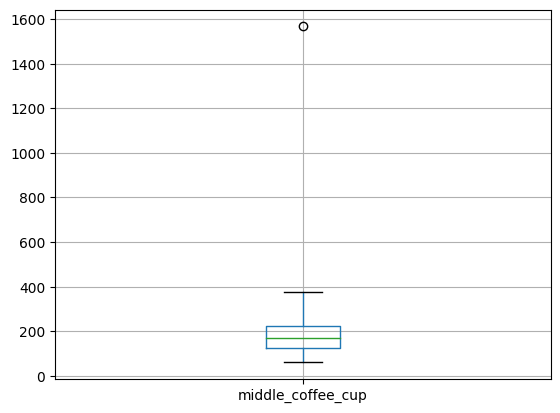

In [ ]:
df.boxplot('middle_coffee_cup')

Присутсвует один аномальный выброс, но он не мешает. Ориентируюсь на медианную стоимость чашки капучино - 169 р.

Посмотрю как распределена медианная стоимость чашки капучино по округам Москвы.

In [ ]:
median_price_cofee= coffee_shops.groupby('district')['middle_coffee_cup'].median()
m = Map(location=[moscow_lat, moscow_lng], zoom_start=10)


Choropleth(
    geo_data=state_geo,
    data= median_price_cofee,
    columns=['district', 'middle_coffee_cup'],
    key_on='feature.name',
    fill_color='YlGn',
    fill_opacity=0.8,
    legend_name='Медианная стоимость чашки капучино по округам',
).add_to(m)

m

В Восточном административном округе чашка кофе Вам обойдется примерно в 135-146 рублей. А вот в центре и на юго-западе придётся выложить за чашку капучино до 198 р.

Взглянем на зависимость стоимости чашки капучино от рейтинга кофейни.

In [ ]:
coffee_shops.reset_index()

,index,name,category,address,district,hours,lat,lng,rating,price,avg_bill,middle_avg_bill,middle_coffee_cup,chain,seats,street,is_24/7
0,3,dormouse coffee shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",55.881608,37.488860,5.0,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0,0,NaN,улица Маршала Федоренко,False
1,25,в парке вкуснее,кофейня,"Москва, парк Левобережный",Северный административный округ,"ежедневно, 10:00–21:00",55.878453,37.460028,4.3,NaN,NaN,NaN,NaN,1,NaN,парк Левобережный,False
2,45,9 bar coffee,кофейня,"Москва, Коровинское шоссе, 41, стр. 1",Северный административный округ,пн-пт 08:00–18:00,55.885837,37.513422,4.0,NaN,NaN,NaN,NaN,1,46.0,Коровинское шоссе,False
3,46,cofefest,кофейня,"Москва, улица Маршала Федоренко, 6с1",Северный административный округ,пн-пт 09:00–19:00,55.879934,37.492522,3.6,NaN,NaN,NaN,NaN,1,NaN,улица Маршала Федоренко,False
4,52,cofix,кофейня,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 08:00–22:00",55.878531,37.479395,3.8,NaN,NaN,NaN,NaN,1,NaN,улица Дыбенко,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1408,8356,назис пури,кофейня,"Москва, Люблинская улица, 61",Юго-Восточный административный округ,"ежедневно, 09:00–22:00",55.684103,37.738588,4.5,NaN,NaN,NaN,NaN,0,NaN,Люблинская улица,False
1409,8365,квадрат кофе,кофейня,"Москва, Волгоградский проспект, 73, стр. 1",Юго-Восточный административный округ,"пн-пт 08:30–21:30; сб,вс 09:00–21:30",55.709710,37.744450,4.2,NaN,Цена чашки капучино:100–220 ₽,NaN,160.0,0,206.0,Волгоградский проспект,False
1410,8376,шоколад имбирь корица,кофейня,"Москва, Грайвороновская улица, 23",Юго-Восточный административный округ,пн-пт 09:30–19:30,55.721213,37.740755,4.1,NaN,NaN,NaN,NaN,0,NaN,Грайвороновская улица,False
1411,8385,cafio,кофейня,"Москва, Новохохловская улица, 49",Юго-Восточный административный округ,"пн-пт 07:00–22:00; сб,вс 07:00–21:00",55.724357,37.716415,4.7,NaN,Цена чашки капучино:80–120 ₽,NaN,100.0,0,NaN,Новохохловская улица,False


Коэффицент корреляции: 0.10044742207847555


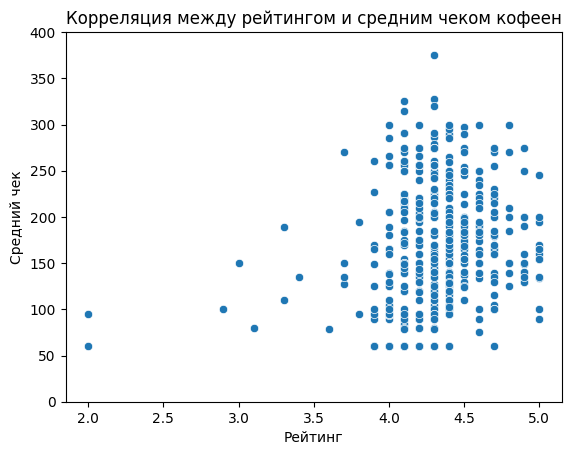

In [ ]:
sns.scatterplot(data=coffee_shops, x='rating', y='middle_coffee_cup')

plt.title('Корреляция между рейтингом и средним чеком кофеен')
plt.xlabel('Рейтинг')
plt.ylabel('Средний чек')
plt.ylim(0,400)
correlation_coeff = df['rating'].corr(df['middle_coffee_cup'])
print('Коэффицент корреляции:', correlation_coeff)
plt.show()

Рейтинг кофейни не зависит стоимости чашки капучино. Это говорит о том, что хороший капучино не значит дорогой.

Взгляну на зависимость рейтинга кофейни и количества посадочных мест, помещение кофейни играет важную роль в оценке кофейни.

Коэффицент корреляции: 0.02110871919674766


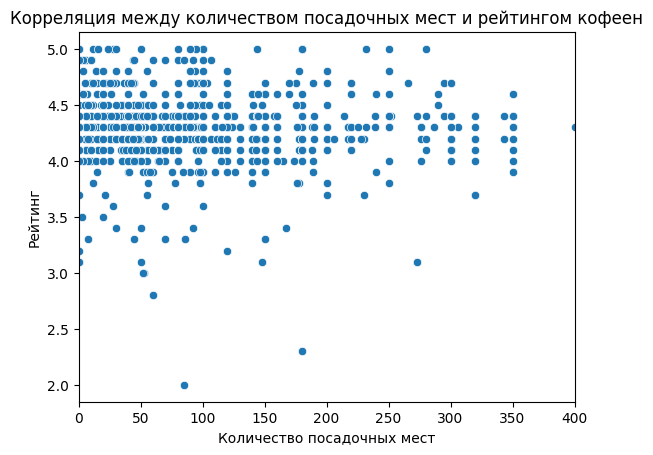

In [ ]:
sns.scatterplot(data=coffee_shops, x='seats', y='rating')

plt.title('Корреляция между количеством посадочных мест и рейтингом кофеен')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Рейтинг')
plt.xlim(0,400)

correlation_coeff = df['seats'].corr(df['rating'])
print('Коэффицент корреляции:', correlation_coeff)
plt.show()

Зависимость практически отсутсвует, исходя из графика мы видим, что большинство кофеен имеет до 150 посадочных мест. Время подвести итоги 4-го шага.

> В очередном шаге  исследования я провел исследовали кофеен: их количество, режимы работы,  рейтинги и стоимость чашки капучино. Основные моменты, которые хочется выделить из данной таблицы:
*   В Москве 1413 кофеен;
*   Круглосуточных чуть более 5%;
*   Рейтинг кофеен по Москве, почти одинаков;
*   От рейтинга кофейни не зависит ни стоимость чашки капучино, ни количество посадочных мест;
*   Основая часть кофеен имеет до 150 посадочных мест.
<br>При открытии необходимо ориентироваться на стоимость от 135 до 198 рублей, в зависимости от расположения кофейни. Также необходимо учесть, что просторное заведение на более чем 150 посадочных мест не значит, что кофейня обречена на успех. Если рассматривать Южный и Юго-Восточный округа, можно рассмотреть вариант круглосуточной кофейни так как в этих округах лишь по одной круглосуточной кофейне, при этом учитывает другие экономические факторы.

Заказчик попросил подготвить презентацию в формате .pdf. Прикладываю ссылку на презентацию в markdown-ячейке в формате:
<br>`https://disk.yandex.ru/d/CYX-fZduZnA99A`
